In [110]:
%matplotlib inline 

## Относительная яркость свечения плазмы в трубке при различных давлениях 
Изображение это прямоугольная таблица имеющие некоторое количество строк и некоторое количество столцов и в каждой ячейке такой прямоугольной таблицы записано число которое коридует цвет в градиациях. Изображение распадается на квадратные области однородного цвета называемые пикселями (пересечения строк и столцов).
Для цветных изображений пиксель — это кортеж (R-Red, G-Green, B-Blue).

Яркость пикселя просто: I = (R + G + B) / 3. (В этой задачи мы делим ещё на 255 чтобы получить интервал значения от 0 до 1)

In [124]:
from skimage.io import imread, imshow, imsave
from PIL import Image
from scipy.interpolate import make_interp_spline
import numpy as np
import matplotlib.pyplot as plt
from skimage import color

Исходные изображения будут иметь разные размеры и ориентацию. Во-первых, исправьте ориентацию изображения, чтобы источник света проецировался слева направо. Затем мы изменим размер изображений до того же размера, чтобы продолжить обработку изображения.

In [ ]:
# изменить размер изображения до 200x300
# from PIL import Image
# img = Image.open("0.1Tорр.jpg")
# width = 300
# height = 200
# resized_img = img.resize((width, height))
# resized_img.save('image.png')

In [112]:
img = imread('image.png') # При Давлении Р = 0.1 Торр
img1 = imread('image1.png') # При Давлении Р = 0.5 Торр
img2 = imread('image2.png') # При Давлении Р = 1 Торр
img3 = imread('image3.png') # При Давлении Р = 2.5 Торр
img4 = imread('image4.png') # При Давлении Р = 5 Торр

In [89]:
img.shape

(200, 300, 3)

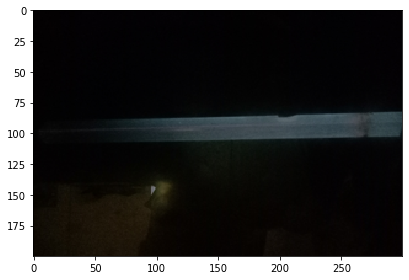

In [90]:
imshow(img)

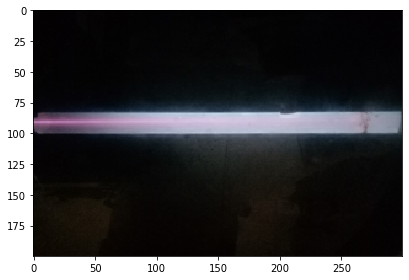

In [91]:
imshow(img1)

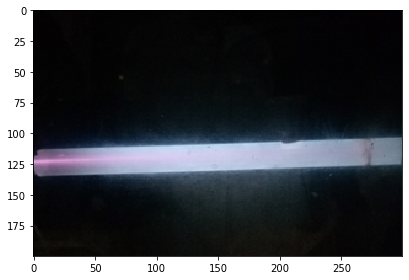

In [92]:
imshow(img2)

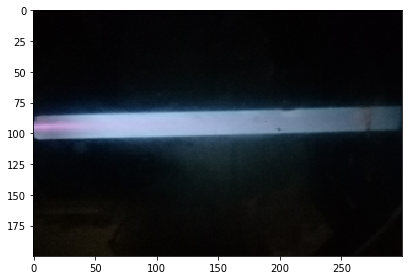

In [93]:
imshow(img3)

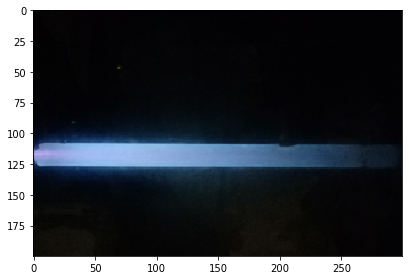

In [94]:
imshow(img4)

In [142]:
# Для построения графика изменения яркости с давлением фиксируем точку на трубке, например точку с координатами x = 100, 
# затем выбираем подходящую координату y на каждой картинке и вычисляем яркость в этих точках
P = [0.1, 0.5, 1, 2.5, 5]
I_P = []

In [143]:
# Р = 0.1 Торр
img = Image.open("image.png")
pixels = img.load()

r1,g1,b1 = pixels[100,100]
i1 = (r1 + g1 + b1)/(3*255)
I_P.append(i1)

I = []
y = 100 # выберите соответствующую координату y (вертикальную) в пределах диапазона координат трубы
for x in range(img.width):
    r, g, b = pixels[x, y]
    pixels[x, y] = g, b, r
    i = (r+g+b)/(3*255)
    I.append(i)
X = [x for x in range(img.width)]
X = np.array(X)
I = np.array(I)

#define x as 25 equally spaced values between the min and max of original x 
Xnew = np.linspace (X.min(), X.max(), 25) 
#define spline with degree k=3
spl = make_interp_spline(X, I, k=3)
I_smooth = spl(Xnew)

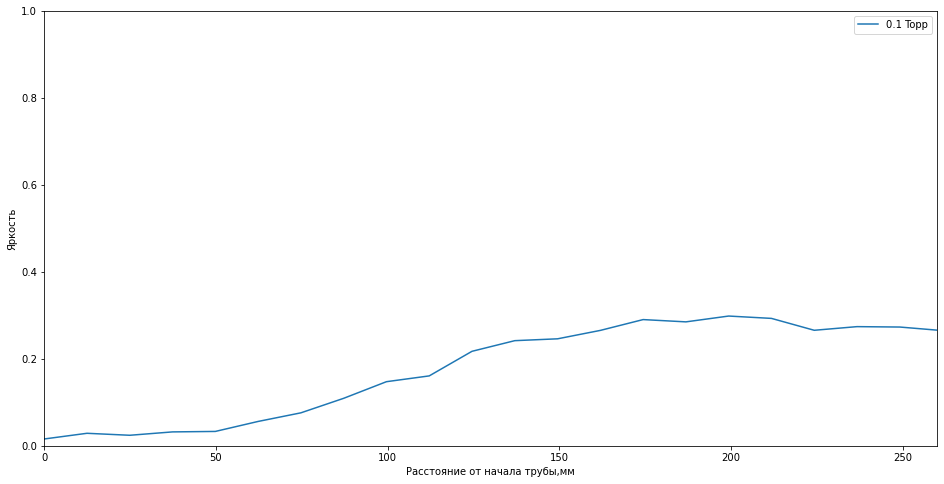

In [144]:
plt.figure(figsize = (16,8))
plt.xlabel("Расстояние от начала трубы,мм")
plt.ylabel("Яркость")
plt.plot(Xnew,I_smooth, label="0.1 Topp")
# plt.plot(X1new,I1_smooth, label="0.5 Topp");
# plt.plot(X2new,I2_smooth, label="1 Topp");
# plt.plot(X3new,I3_smooth, label="2.5 Topp");
# plt.plot(X4new,I4_smooth, label="5 Topp");
plt.legend()
plt.axis([0,260,0,1]); 
plt.show()
# plt.axis("equal");

In [145]:
# Р = 0.5 Торр
img1 = Image.open("image1.png")
pixels = img1.load()

r2,g2,b2 = pixels[100,90]
i2 = (r2 + g2 + b2)/(3*255)
I_P.append(i2)

I1 = []
y = 90 # выберите соответствующую координату y (вертикальную) в пределах диапазона координат трубы
for x in range(img1.width):
    r, g, b = pixels[x, y]
    pixels[x, y] = g, b, r
    i = (r+g+b)/(3*255)
    I1.append(i)
X1 = [x for x in range(img1.width)]
X1 = np.array(X1)
I1 = np.array(I1)

#define x as 25 equally spaced values between the min and max of original X 
X1new = np.linspace (X1.min(), X1.max(), 25) 
#define spline with degree k=3
spl = make_interp_spline(X1, I1, k=3)
I1_smooth = spl(X1new)

In [146]:
# Р = 1 Торр
img2 = Image.open("image2.png")
pixels = img2.load()

r3,g3,b3 = pixels[100,125]
i3 = (r3 + g3 + b3)/(3*255)
I_P.append(i3)

I2 = []
y = 125 # выберите соответствующую координату y (вертикальную) в пределах диапазона координат трубы
for x in range(img2.width):
    r, g, b = pixels[x, y]
    pixels[x, y] = g, b, r
    i = (r+g+b)/(3*255)
    I2.append(i)
X2 = [x for x in range(img2.width)]
X2 = np.array(X2)
I2 = np.array(I2)

#define x as 25 equally spaced values between the min and max of original X 
X2new = np.linspace (X2.min(), X2.max(), 25) 
#define spline with degree k=3
spl = make_interp_spline(X2, I2, k=3)
I2_smooth = spl(X2new)

In [147]:
# Р = 2.5 Торр
img3 = Image.open("image3.png")
pixels = img3.load()

r4,g4,b4 = pixels[100,100]
i4 = (r4 + g4 + b4)/(3*255)
I_P.append(i4)

I3 = []
y = 90 # выберите соответствующую координату y (вертикальную) в пределах диапазона координат трубы
for x in range(img3.width):
    r, g, b = pixels[x, y]
    pixels[x, y] = g, b, r
    i = (r+g+b)/(3*255)
    I3.append(i)
X3 = [x for x in range(img3.width)]
X3 = np.array(X3)
I3 = np.array(I3)

#define x as 25 equally spaced values between the min and max of original X 
X3new = np.linspace (X3.min(), X3.max(), 25) 
#define spline with degree k=3
spl = make_interp_spline (X3, I3, k=3)
I3_smooth = spl(X3new)

In [148]:
# Р = 5 Торр
img4 = Image.open("image4.png")
pixels = img4.load()

r5,g5,b5 = pixels[100,100]
i5 = (r5 + g5 + b5)/(3*255)
I_P.append(i5)

I4 = []
y = 120 # выберите соответствующую координату y (вертикальную) в пределах диапазона координат трубы
for x in range(img4.width):
    r, g, b = pixels[x, y]
    pixels[x, y] = g, b, r
    i = (r+g+b)/(3*255)
    I4.append(i)
X4 = [x for x in range(img4.width)]
X4 = np.array(X4)
I4 = np.array(I4)

#define x as 25 equally spaced values between the min and max of original X 
X4new = np.linspace (X4.min(), X4.max(), 25)
#define spline with degree k=3
spl = make_interp_spline (X4, I4, k = 3 )
I4_smooth = spl(X4new)

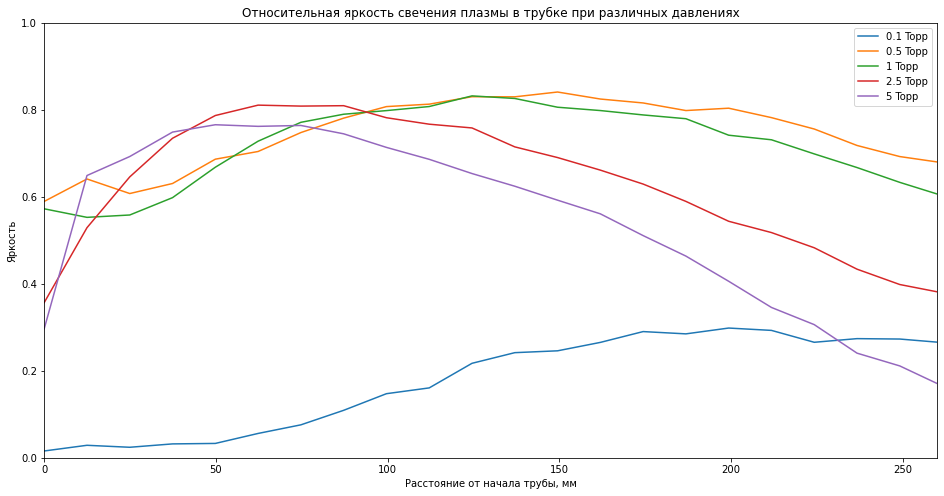

In [150]:
plt.figure(figsize = (16,8))
plt.title("Относительная яркость свечения плазмы в трубке при различных давлениях")
plt.xlabel("Расстояние от начала трубы, мм")
plt.ylabel("Яркость")
plt.plot(Xnew,I_smooth, label="0.1 Topp")
plt.plot(X1new,I1_smooth, label="0.5 Topp");
plt.plot(X2new,I2_smooth, label="1 Topp");
plt.plot(X3new,I3_smooth, label="2.5 Topp");
plt.plot(X4new,I4_smooth, label="5 Topp");
plt.legend()
plt.axis([0,260,0,1]); 
plt.show()

In [137]:
P = np.array(P)
I_P = np.array(I_P)
#define x as 200 equally spaced values between the min and max of original X 
Pnew = np.linspace (P.min(), P.max(), 200) 
#define spline with degree k=3
spl = make_interp_spline (P, I_P, k = 3)
I_smooth = spl(Pnew)

In [138]:
I_P

array([0.15163399, 0.80784314, 0.8       , 0.76862745, 0.12418301])

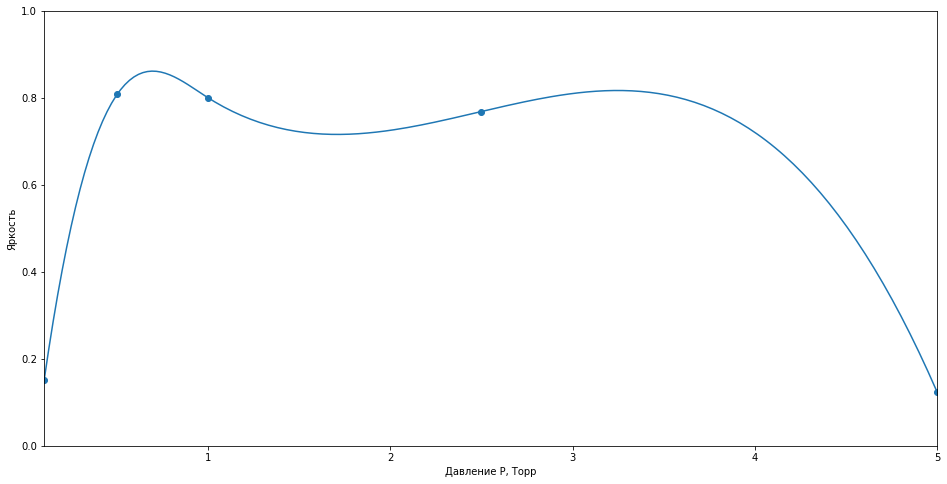

In [139]:
plt.figure(figsize = (16,8))
plt.xlabel("Давление P, Торр")
plt.ylabel("Яркость")
plt.plot(Pnew, I_smooth)
plt.scatter(P, I_P)
plt.axis([0.1,5,0,1]); 
plt.show()